<a href="https://colab.research.google.com/github/likitha888/python/blob/main/Medical_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Classified Data.txt",index_col=0)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[130  12]
 [ 13 145]]


In [ ]:
# will take some time
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

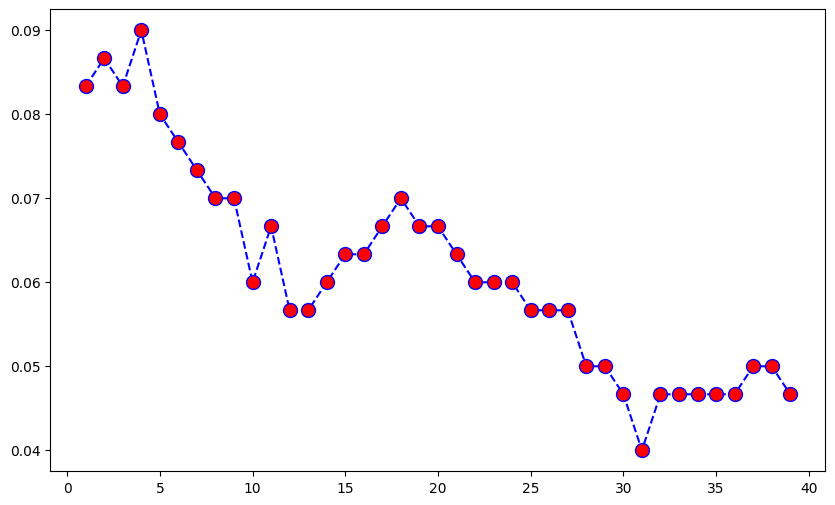

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

Text(0, 0.5, 'Error Rate')

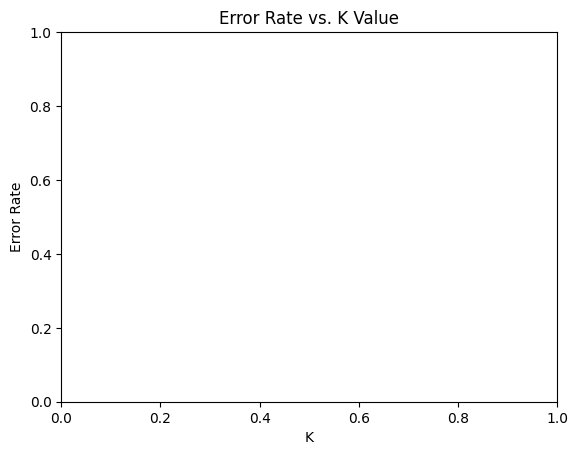

In [ ]:
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv("/content/D1.csv")
print(df)

     colored_sputum  cough  fever  headache class
0               1.0    3.5    9.4       3.0   flu
1               1.0    3.4    8.4       4.0   flu
2               1.0    3.3    7.3       3.0   flu
3               1.0    3.4    9.5       4.0   flu
4               1.0    2.0    8.0       3.5   flu
..              ...    ...    ...       ...   ...
145             0.0    1.0    4.2       2.3  cold
146             0.5    2.5    2.0       1.7  cold
147             0.0    1.0    3.2       2.0  cold
148             0.4    3.4    2.4       2.3  cold
149             0.0    1.0    3.1       1.8  cold

[150 rows x 5 columns]


In [ ]:
x=df.loc[:,'colored_sputum':'headache']
y=df.loc[:,'class']

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier()

In [ ]:
df=pd.read_csv("/content/D1.csv")

Text(0, 0.5, 'Class')

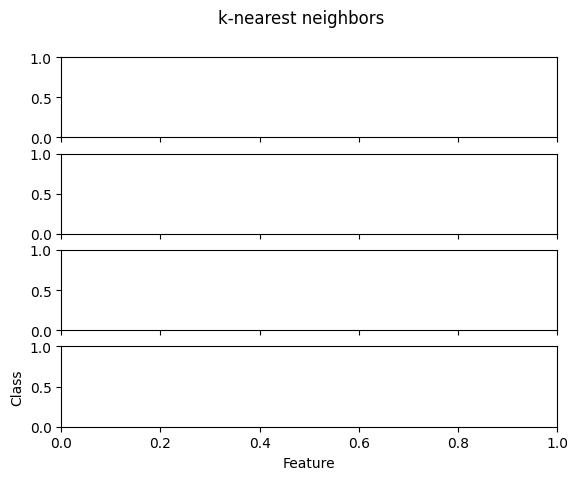

In [ ]:
figure,(sub1,sub2,sub3,sub4) = plt.subplots(4,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class')

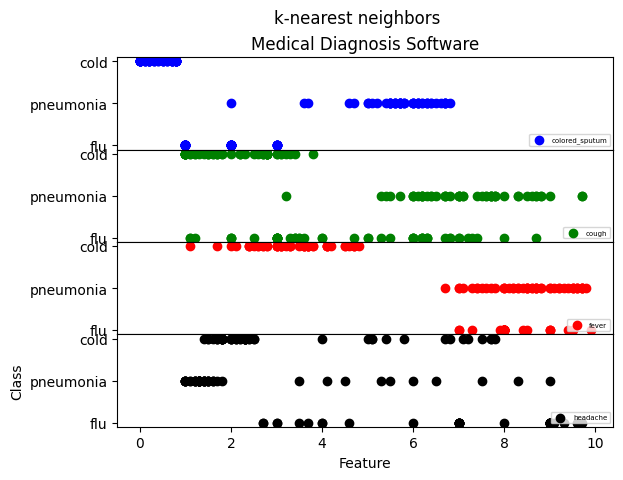

In [ ]:
# Plotting the relation of each feature with each class
figure,(sub1,sub2,sub3,sub4)=plt.subplots(4,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class')
X = df.loc[:,'colored_sputum']
Y = df.loc[:,'class']
sub1.scatter(X, Y,color='blue',label='colored_sputum')
sub1.legend(loc=4, prop={'size': 5})
sub1.set_title('Medical Diagnosis Software')
X = df.loc[:,'cough']
Y = df.loc[:,'class']
sub2.scatter(X, Y,color='green',label='cough')
sub2.legend(loc=4, prop={'size': 5})
X = df.loc[:,'fever']
Y = df.loc[:,'class']
sub3.scatter(X, Y,color='red',label='fever')
sub3.legend(loc=4, prop={'size': 5})
X = df.loc[:,'headache']
Y = df.loc[:,'class']
sub4.scatter(X, Y,color='black',label='headache')
sub4.legend(loc=4, prop={'size': 5})
figure.subplots_adjust(hspace=0)
plt.show()
#Evaluating the symptoms on a scale of 1 to 9
#@title Evaluation form
colored_sputum =  5#@param {type:"integer"}
cough=8#@param {type:"integer"}
fever=9#@param {type:"integer"}
headache=1#@param {type:"integer"}

In [ ]:
#The prediction based on the symptoms

# colored_sputum,cough,fever,headache
cs=colored_sputum;c=cough;f=fever;h=headache;
X_DL = [[cs,c,f,h]]
prediction = knn.predict(X_DL)
print ("The prediction is:",str(prediction).strip('[]'))

The prediction is: 'pneumonia'


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
